In [1]:
import pandas as pd

df = pd.read_csv("../data/retail_sales_engineered.csv", parse_dates=["Date"])
df = df.sort_values("Date")

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,IsHoliday_y,Year,Month,Week,DayOfWeek,Sales_Lag_1,Sales_Lag_2,Sales_MA_4,Holiday_Flag
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,...,8.106,False,2010,2,5,4,0.0,0.0,NaN,0
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,5347.45,...,10.064,False,2010,2,5,4,0.0,0.0,NaN,0


In [2]:
# Aggregated Sales (Total Weekly Sales).
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

<Axes: xlabel='Date'>

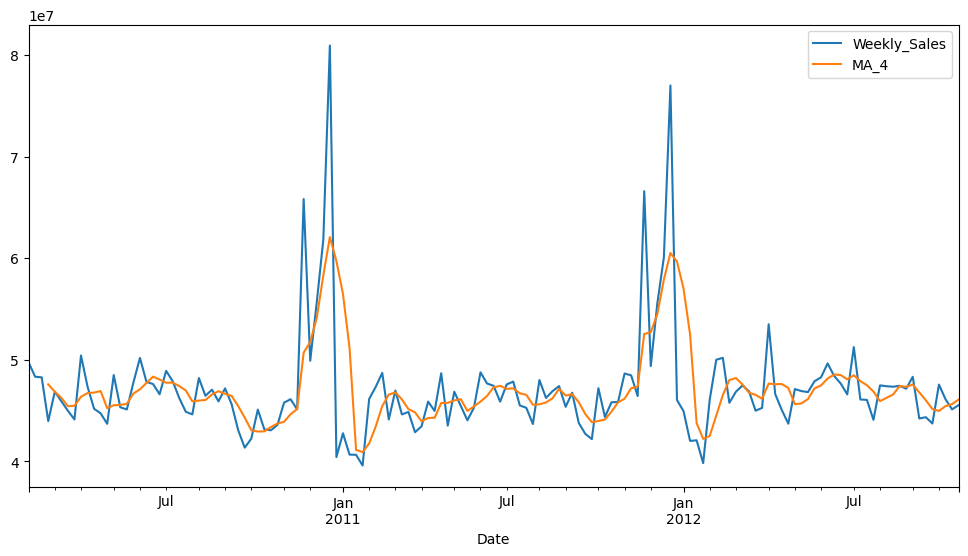

In [3]:
# Moving Average Forecast.
weekly_sales["MA_4"] = weekly_sales["Weekly_Sales"].rolling(window=4).mean()
weekly_sales.plot(x="Date", y=["Weekly_Sales", "MA_4"], figsize=(12,6))

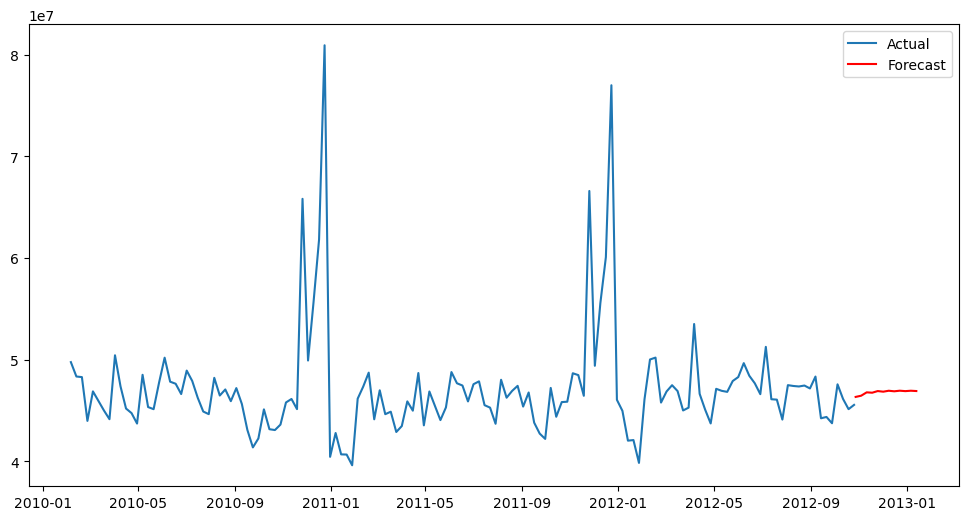

In [4]:
# ARIMA Model (AutoRegressive Integrated Moving Average).
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA (simple version, no tuning yet)
model = ARIMA(weekly_sales["Weekly_Sales"], order=(2,1,2))
model_fit = model.fit()

# Forecast next 12 weeks
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(12,6))
plt.plot(weekly_sales["Date"], weekly_sales["Weekly_Sales"], label="Actual")
plt.plot(pd.date_range(weekly_sales["Date"].iloc[-1], periods=12, freq="W"), forecast, label="Forecast", color="red")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Weekly Sales with Moving Averages')

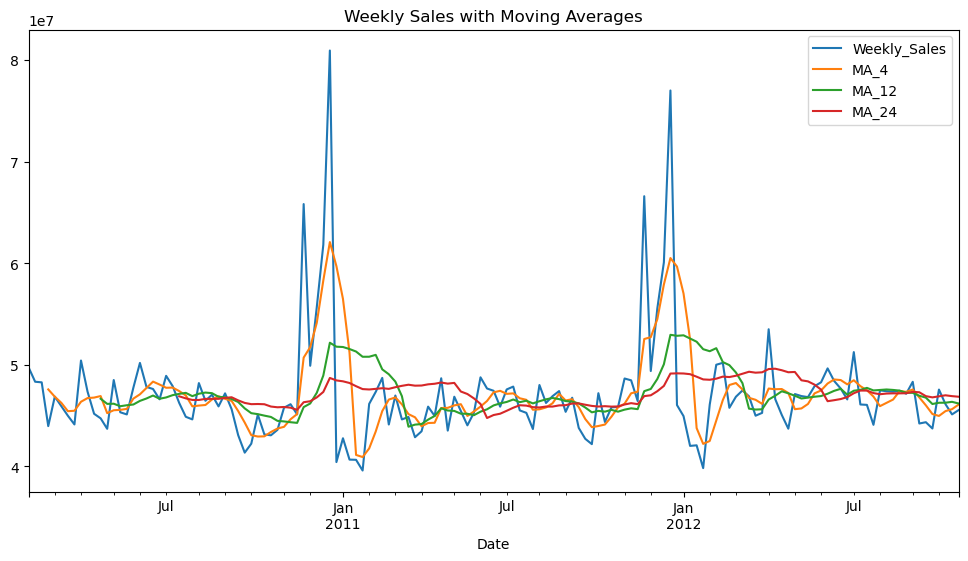

In [5]:
# Moving Average (with multiple windows).
'''
Different windows (4 weeks, 12 weeks, 24 weeks) show short-term vs long-term trends.
'''
weekly_sales["MA_4"] = weekly_sales["Weekly_Sales"].rolling(window=4).mean()
weekly_sales["MA_12"] = weekly_sales["Weekly_Sales"].rolling(window=12).mean()
weekly_sales["MA_24"] = weekly_sales["Weekly_Sales"].rolling(window=24).mean()

weekly_sales.plot(x="Date", y=["Weekly_Sales", "MA_4", "MA_12", "MA_24"], figsize=(12,6))
plt.title("Weekly Sales with Moving Averages")

In [6]:
# Auto-ARIMA, Instead of guessing (p,d,q) values, auto-arima helps find the best model.
# m=52 means seasonality per year (52 weeks).
from pmdarima import auto_arima
auto_model = auto_arima(weekly_sales["Weekly_Sales"], seasonal=True, m=52, trace=True)
print(auto_model.summary())

c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.760, Time=6.77 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.691, Time=0.01 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.381, Time=0.99 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.927, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.768, Time=0.00 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=3.39 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.813, Time=4.45 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.548, Time=0.12 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.801, Time=18.61 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4773.076, Time=30.56 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.852, Time=3.23 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.475, Time=4.50 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.157, Time=5.74 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.845, Time=4.38 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=4783.297, Time=4.97 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,0,0)[52] intercept   : AIC=4780.613, Time=3.57 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,0)[52] intercept   : AIC=4781.038, Time=5.77 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(1,0,0)[52] intercept   : AIC=4773.349, Time=7.45 sec


c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[52]             : AIC=4797.052, Time=2.53 sec

Best model:  ARIMA(2,0,2)(1,0,0)[52] intercept
Total fit time: 107.738 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -2376.907
Date:                             Sun, 24 Aug 2025   AIC                           4767.813
Time:                                     23:07:24   BIC                           4788.553
Sample:                                          0   HQIC                          4776.241
                                             - 143                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

c:\Users\jayja\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


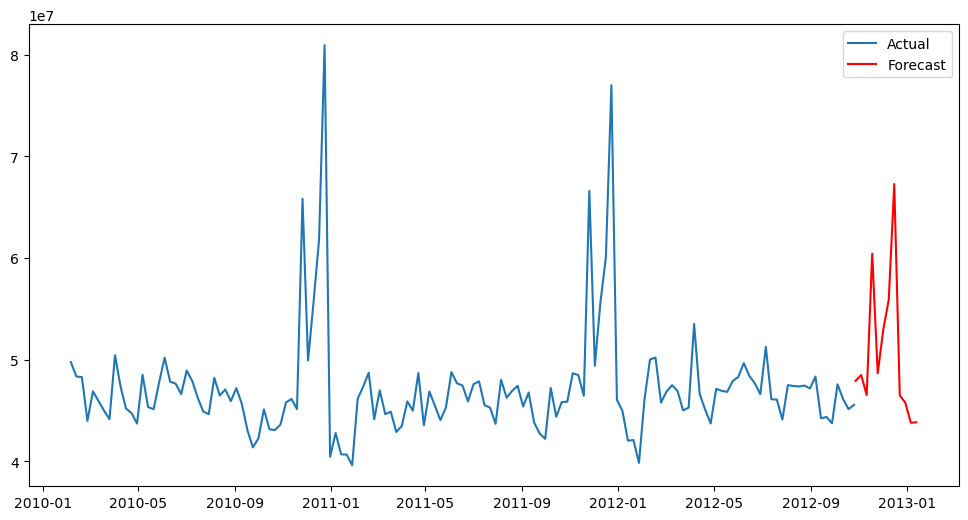

In [7]:
# Forecast done with the auto_arima model (Tuned model).
future_forecast = auto_model.predict(n_periods=12)

plt.figure(figsize=(12,6))
plt.plot(weekly_sales["Date"], weekly_sales["Weekly_Sales"], label="Actual")
plt.plot(pd.date_range(weekly_sales["Date"].iloc[-1], periods=12, freq="W"), future_forecast, label="Forecast", color="red")
plt.legend()
plt.show()

In [34]:
# Now, Let's move on to ML forecasting methods in the next steps.
# ARIMA only uses past sales → no external factors.
import pandas as pd
df = pd.read_csv("../data/retail_sales_engineered.csv", parse_dates=["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df["Lag_1"] = df["Weekly_Sales"].shift(1)
df["Lag_2"] = df["Weekly_Sales"].shift(2)
df["Lag_3"] = df["Weekly_Sales"].shift(3)

df["Rolling_Mean_4"] = df["Weekly_Sales"].shift(1).rolling(window=4).mean()

df = df.dropna().reset_index(drop=True)


features = ["Store", "Dept", "IsHoliday", "Temperature", "Fuel_Price", "CPI", 
            "Unemployment", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", 
            "MarkDown5", "Lag_1", "Lag_2", "Lag_3", "Rolling_Mean_4"]
X = df[features]
y = df["Weekly_Sales"]

In [35]:
# Now, we do the train-test split based on time (not random).
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [ ]:
# Now, we use the RandomForestRegressor.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest MAE: {mae:.2f}")


In [ ]:
# The XGBoost Regressor.
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.2f}")